# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Syakhrul Afandi
- **Email:** m008d4ky2924@bangkit.academy
- **ID Dicoding:** syakhrul_afandi_b8m2

## Menentukan Pertanyaan Bisnis

- Apa saja 5 produk terlaris dan 5 produk paling tidak diminati?
- Bagaimana tren penjualan produk terlaris?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Wrangling

### Gathering Data

In [2]:
#import seluruh dataframe yang ada
order_items = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/olist_order_items_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/olist_orders_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/olist_products_dataset.csv')
product_category = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/product_category_name_translation.csv')

### Assessing Data

In [3]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Cleaning Data

#### Cek Missing Value

In [9]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
#Membuat dataframe yang merupakan hasil dari join beberapa dataframe lain seperti products, order_items, orders, dan product_category
df = pd.merge(pd.merge(pd.merge(products, order_items, on='product_id', how='outer'), orders, on='order_id', how='left'), product_category, on='product_category_name', how='outer')

In [13]:
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,...,16.90,7.78,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,...,16.90,7.78,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,339.00,17.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,7b13c77c64a9a956500cbf1a9a23798d,...,275.00,23.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,perfumery


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     112650 non-null  object 
 1   product_category_name          111047 non-null  object 
 2   product_name_lenght            111047 non-null  float64
 3   product_description_lenght     111047 non-null  float64
 4   product_photos_qty             111047 non-null  float64
 5   product_weight_g               112632 non-null  float64
 6   product_length_cm              112632 non-null  float64
 7   product_height_cm              112632 non-null  float64
 8   product_width_cm               112632 non-null  float64
 9   order_id                       112650 non-null  object 
 10  order_item_id                  112650 non-null  int64  
 11  seller_id                      112650 non-null  object 
 12  shipping_limit_date           

In [15]:
bigten = df.groupby('product_category_name_english').size().sort_values(ascending=False).head(10)

In [16]:
lowest10 = df.groupby('product_category_name_english').size().sort_values(ascending=True).head(10)

In [17]:
#slicing df untuk mengambil informasi yang diperlukan untuk menjawab pertanyaan 2
df_2 = df[['product_category_name_english', 'order_purchase_timestamp']]

In [18]:
#mengekstrak order_purchase_timestamp hanya menjadi tanggal saja
df_2['tanggal']=df_2['order_purchase_timestamp'].apply(lambda x: re.findall(r'^.{0,10}', x)[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_10440\2620893323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['tanggal']=df_2['order_purchase_timestamp'].apply(lambda x: re.findall(r'^.{0,10}', x)[0])


In [19]:
#Mencari jumlah pernjualan per produk per hari
df_2_clean = df_2.groupby(['product_category_name_english', 'tanggal']).size().reset_index(name='Count')

In [20]:
df_2_clean.head()

,product_category_name_english,tanggal,Count
0,agro_industry_and_commerce,2017-01-23,2
1,agro_industry_and_commerce,2017-01-31,1
2,agro_industry_and_commerce,2017-02-05,1
3,agro_industry_and_commerce,2017-02-08,1
4,agro_industry_and_commerce,2017-02-12,1


In [21]:
final_2=df_2_clean[df_2_clean['product_category_name_english'].isin(['bed_bath_table'])]
final_2

,product_category_name_english,tanggal,Count
1895,bed_bath_table,2016-10-04,2
1896,bed_bath_table,2016-10-05,1
1897,bed_bath_table,2016-10-06,1
1898,bed_bath_table,2016-10-09,4
1899,bed_bath_table,2017-01-08,1
...,...,...,...
2488,bed_bath_table,2018-08-24,7
2489,bed_bath_table,2018-08-25,8
2490,bed_bath_table,2018-08-26,4
2491,bed_bath_table,2018-08-27,7


In [22]:
for i in range(final_2.shape[0]):
  final_2['tanggal'].iloc[i] = datetime.strptime(final_2['tanggal'].iloc[i], '%Y-%m-%d').date()

C:\Users\HP\AppData\Local\Temp\ipykernel_10440\4226755744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2['tanggal'].iloc[i] = datetime.strptime(final_2['tanggal'].iloc[i], '%Y-%m-%d').date()


In [23]:
final_2['tanggal'] = pd.to_datetime(final_2['tanggal'])
penjualan_per_bulan = final_2.groupby(final_2['tanggal'].dt.to_period('M')).sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_10440\1186468991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2['tanggal'] = pd.to_datetime(final_2['tanggal'])


In [24]:
penjualan_per_bulan

,Count
tanggal,
2016-10,8
2017-01,48
2017-02,165
2017-03,289
2017-04,274
2017-05,369
2017-06,382
2017-07,579
2017-08,512


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0.5, 1.0, 'Jumlah Produk per Kategori')

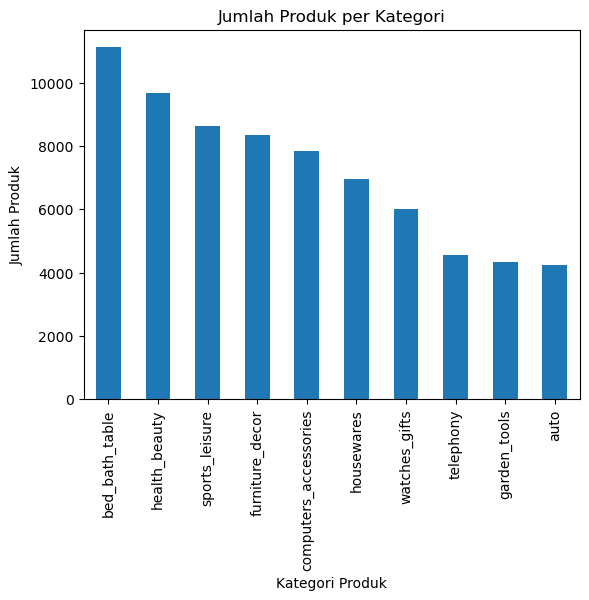

In [25]:
#Membuat plot untuk 10 kategori terlaris
bigten.plot(kind='bar')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk')
plt.title('Jumlah Produk per Kategori')

Text(0.5, 1.0, 'Jumlah Produk per Kategori')

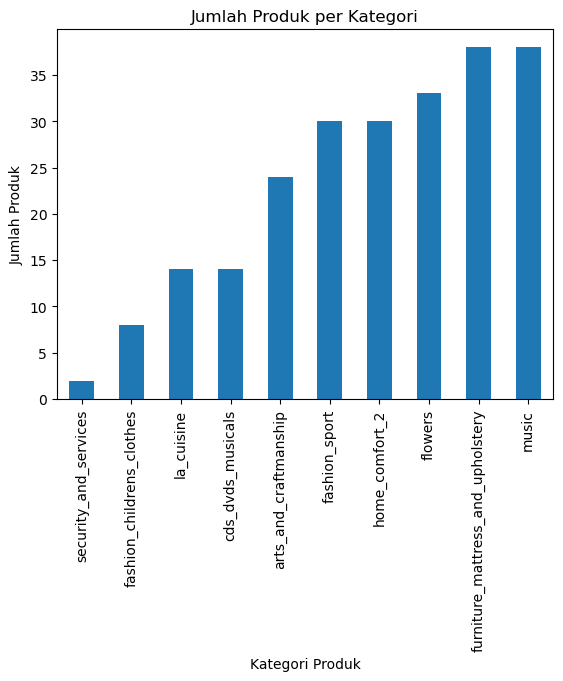

In [26]:
#Membuat plot untuk 10 kategori paling kurang diminati
lowest10.plot(kind='bar')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk')
plt.title('Jumlah Produk per Kategori')

### Pertanyaan 2:

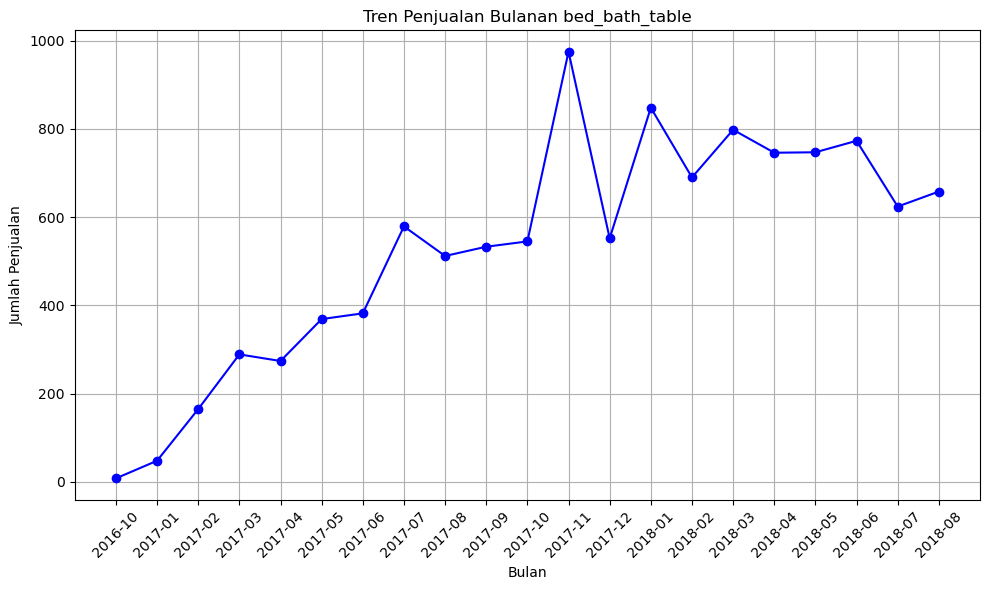

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(penjualan_per_bulan.index.astype(str), penjualan_per_bulan['Count'], marker='o', color='b', linestyle='-')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.title('Tren Penjualan Bulanan bed_bath_table')


plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution Pertanyaan 1:
1. 10 Produk Terlaris yakni: bed_bath_table, health_beauty, sports_leisure, furniture_decor, computers_accessories, housewares, mwatches_gifts, telephony, garden_tools, dan auto
2. 10 Produk Paling Kurang Diminati: security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship, fashion_sport, home_comfort_2, flowers, furniture_mattres_and_upholstery, music
- Conclution pertanyaan 2:
Dari plot yang terbentuk, dapat disimpulkan bahwa tren penjualan bed_bath_table memiliki tren naik dari waktu ke waktu

#CLUSTERING

In [28]:
#Menyiapkan dataframe untuk clustering product
Analisis = pd.merge(df[['product_id', 'product_category_name_english', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price']], df.groupby('product_id').size().reset_index(name='count_sold'), on='product_id', how='outer')
Analisis

,product_id,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0,10.91,1
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,400.0,27.0,5.0,20.0,16.90,2
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,400.0,27.0,5.0,20.0,16.90,2
3,0d009643171aee696f4733340bc2fdd0,perfumery,422.0,21.0,16.0,18.0,339.00,11
4,0d009643171aee696f4733340bc2fdd0,perfumery,422.0,21.0,16.0,18.0,275.00,11
...,...,...,...,...,...,...,...,...
112645,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,550.0,35.0,15.0,25.0,65.00,14
112646,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,550.0,35.0,15.0,25.0,45.00,14
112647,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,550.0,35.0,15.0,25.0,65.00,14
112648,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,550.0,35.0,15.0,25.0,45.00,14


In [40]:
clustering = Analisis.groupby('product_category_name_english').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean',
    'price': 'mean',
    'count_sold': 'sum'
}).reset_index()
clustering

,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold
0,agro_industry_and_commerce,3625.113208,28.938679,23.787736,20.867925,342.124858,1926
1,air_conditioning,4118.016835,38.585859,21.464646,26.191919,185.269226,1533
2,art,1557.545455,49.043062,8.535885,36.531100,115.802105,11795
3,arts_and_craftmanship,1369.875000,30.916667,10.916667,21.541667,75.583750,46
4,audio,1218.423077,20.065934,9.478022,15.494505,139.254121,9008
...,...,...,...,...,...,...,...
66,stationery,2751.514899,35.012714,21.625745,25.176798,91.753369,35207
67,tablets_printing_image,307.096386,25.506024,9.626506,23.277108,90.703735,1811
68,telephony,261.622222,18.389439,6.354675,13.399120,71.213978,82335
69,toys,1857.368472,30.700510,21.154967,24.594851,117.548360,64571


In [41]:
#Clustering Produk dengan fitur-fitur pada tabel di atas dengan menggunakan metode k-means menjadi 3 cluster, yakni produk paling laku, produk laku, dan produk kurang laku
np.random.seed(21060)
X = clustering[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price', 'count_sold' ]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clustering['cluster']=kmeans.predict(X)
clustering

,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold,cluster
0,agro_industry_and_commerce,3625.113208,28.938679,23.787736,20.867925,342.124858,1926,0
1,air_conditioning,4118.016835,38.585859,21.464646,26.191919,185.269226,1533,0
2,art,1557.545455,49.043062,8.535885,36.531100,115.802105,11795,0
3,arts_and_craftmanship,1369.875000,30.916667,10.916667,21.541667,75.583750,46,0
4,audio,1218.423077,20.065934,9.478022,15.494505,139.254121,9008,0
...,...,...,...,...,...,...,...,...
66,stationery,2751.514899,35.012714,21.625745,25.176798,91.753369,35207,0
67,tablets_printing_image,307.096386,25.506024,9.626506,23.277108,90.703735,1811,0
68,telephony,261.622222,18.389439,6.354675,13.399120,71.213978,82335,0
69,toys,1857.368472,30.700510,21.154967,24.594851,117.548360,64571,0


In [31]:
clustering[clustering['cluster']==0]['count_sold'].sum()

1110615

In [32]:
clustering[clustering['cluster']==1]['count_sold'].sum()

2141149

In [33]:
clustering[clustering['cluster']==2]['count_sold'].sum()

798495

In [34]:
output = clustering
output['Tingkat Kelakuan'] = np.where(output['cluster'] == 0, 'Laku',
                                    np.where(output['cluster'] == 1, 'Sangat Laku', 'Kurang Laku'))
output = output.drop(columns=['cluster'])
output


,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold,Tingkat Kelakuan
0,agro_industry_and_commerce,3625.113208,28.938679,23.787736,20.867925,342.124858,1926,Laku
1,air_conditioning,4118.016835,38.585859,21.464646,26.191919,185.269226,1533,Laku
2,art,1557.545455,49.043062,8.535885,36.531100,115.802105,11795,Laku
3,arts_and_craftmanship,1369.875000,30.916667,10.916667,21.541667,75.583750,46,Laku
4,audio,1218.423077,20.065934,9.478022,15.494505,139.254121,9008,Laku
...,...,...,...,...,...,...,...,...
66,stationery,2751.514899,35.012714,21.625745,25.176798,91.753369,35207,Laku
67,tablets_printing_image,307.096386,25.506024,9.626506,23.277108,90.703735,1811,Laku
68,telephony,261.622222,18.389439,6.354675,13.399120,71.213978,82335,Laku
69,toys,1857.368472,30.700510,21.154967,24.594851,117.548360,64571,Laku


In [35]:
output['price'].max()

1098.3405418719212